# Chapter 12 - Quantifying Uncertainty

*In which we see how to tame uncertainty with numeric degrees of belief.*

## 12.1 Acting under Uncertainty** 
- Agents must navigate uncertainty arising from partial observability, nondeterminism, and adversaries, making it challenging to know their current state or future outcomes. 
- Traditional approaches involve maintaining a belief state (all possible worlds the agent might be in) and creating contingency plans for every possible sensor report. However, this method has significant limitations:
- It requires considering every possible explanation for sensor observations, including highly unlikely ones, leading to an overly complex belief state.
- Contingency plans that cover every eventuality can become unmanageably large and may include extremely unlikely scenarios.
- There might be no plan that guarantees goal achievement, necessitating a method to evaluate and compare non-guaranteed plans.
- An example given is an automated taxi planning to reach the airport 90 minutes before a flight, illustrating that absolute certainty is unattainable due to various uncontrollable factors (e.g., car breakdowns, accidents, road closures).
- This scenario highlights the logical qualification problem, where it's impossible to guarantee success due to uncertain conditions.
- The rational decision or "right thing to do" is identified through the expectation of maximizing the agent's performance measure, considering the agent's knowledge and the relative importance of goals versus their achievability.
- This section sets the stage for developing theories of uncertain reasoning and rational decisions, emphasizing the balance between goal importance and the likelihood of achieving them under uncertainty.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch12_quantifying_uncertainty/DALL%C2%B7E%202024-02-15%2014.14.49%20-%20Illustrate%20a%20scene%20where%20a%20person%20is%20leaving%20their%20home%20to%20head%20to%20the%20airport%20via%20taxi.%20The%20home%20is%20a%20cozy%2C%20inviting%20house%20with%20a%20front%20porch%2C%20situat.webp" width="400">

### 12.1.1 Summarizing Uncertainty**  
- Diagnosing conditions, such as toothaches, inherently involves uncertainty due to multiple potential causes beyond the obvious. Attempting to apply strict propositional logic to diagnosis (e.g., "Toothache implies Cavity") fails because:
- Not all patients with toothaches have cavities; other conditions could be the cause.
- Not all cavities cause toothaches, making direct causal rules inaccurate.
- Comprehensive listing of all conditions or factors leading to a symptom (making a rule logically exhaustive) is impractical due to laziness, theoretical ignorance, and practical ignorance.
- The limitations of using logic for diagnosis include the overwhelming effort required to enumerate all possibilities, the lack of a complete theoretical understanding of all medical conditions, and the impracticality of conducting all possible tests on a patient.
- The relationship between medical conditions and symptoms is not strictly logical but probabilistic, reflecting a degree of belief rather than absolute truth. This probabilistic approach applies broadly beyond medicine to fields like law, business, and design.
- Probability theory serves as the primary tool for handling uncertainty, allowing for a numerical degree of belief between 0 (certainly false) and 1 (certainly true), which addresses the qualification problem by summarizing uncertainty due to lack of knowledge or the impossibility of complete knowledge.
- Probability statements are made relative to a state of knowledge rather than objective reality, meaning that a statement like "The probability of a cavity is 0.8" reflects the likelihood based on current information rather than an absolute condition. Further information can modify these probabilities, illustrating how they correspond to evolving knowledge states rather than fixed realities.

### 12.1.2 Uncertainty and rational decisions

- Rational decisions under uncertainty involve selecting actions that maximize expected utility, which is the sum of the utility of each possible outcome weighted by its probability.

- Decision Theory = Probability Theory + Utility Theory

Probablity Theory:
- Provides a framework for quantifying uncertainty and updating beliefs based on new evidence.

Utility Theory:
- Provides a framework for quantifying preferences over outcomes and selecting actions that maximize expected utility.

For example:
- A patient with a toothache must decide whether to visit a dentist or take painkillers. The patient's decision depends on the expected utility of each action, which is the sum of the utility of each possible outcome weighted by its probability.

## 12.2 Basic Probability Notation

- Probability theory provides a framework for quantifying uncertainty, allowing for the representation of beliefs about uncertain events and the computation of expected values for rational decision-making.
- The basic elements of probability theory include:
  - An event, which is a subset of the sample space.
  - A sample space, which is the set of all possible outcomes of an uncertain event.

  - A probability measure, which assigns a number between 0 and 1 to each event, representing the degree of belief in the event's occurrence.

In [1]:
import matplotlib.pyplot as plt

{2: 0.027812, 3: 0.055749, 4: 0.083813, 5: 0.110898, 6: 0.138764, 7: 0.166929, 8: 0.138457, 9: 0.111081, 10: 0.083322, 11: 0.05558, 12: 0.027595}


''

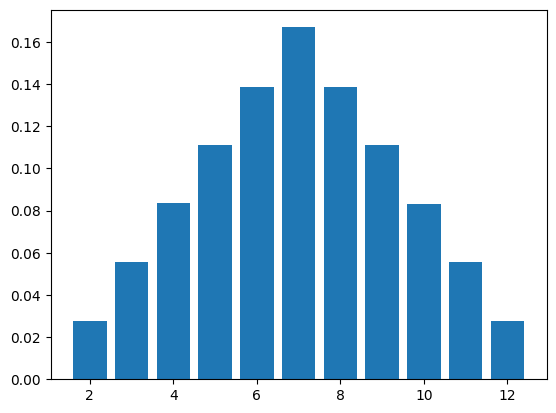

In [4]:
# so take single dice throw
# its a random number between 1 and 6
# so event space is a set of 6 numbers = {1,2,3,4,5,6}
# single event is a single number from the set
# so the probability of each event is 1/6, assuming the dice is fair

# how about two dice throws?
# a sample event from two throws would be a tuple of two numbers (1 to 6)
# so total event space would be a set of 36 tuples
# so the probability of each event is 1/36, assuming the dice is fair

# result of two dice throws is a random number between 2 and 12
# its event space is a set of 11 numbers = {2,3,4,5,6,7,8,9,10,11,12}
# here probablities of each number are not equal

# let's do a simulation to see the probabilities of each number
import random

from collections import Counter
random.seed(2024) # if I did not specify the seed, the result would be different each time I run the code
# so I want to make sure that the result is reproducible
# seed is a number that is used to initialize the PSEUDO / random number generator

# Python uses Mersenne Twister algorithm to generate random numbers
# it has a period of 2^19937 - 1 and is very fast
# see: https://docs.python.org/3/library/random.html

NUM_TRIALS = 1_000_000
result_dict = {i:0 for i in range(2,13)}
throws = [random.randint(1,6) + random.randint(1,6) for _ in range(NUM_TRIALS)]
counter = Counter(throws)
for k,v in counter.items():
    result_dict[k] = v/NUM_TRIALS # this will get us 0 to 1
print(result_dict)

# let's plot it using matplotlib

plt.bar(result_dict.keys(), result_dict.values())
;

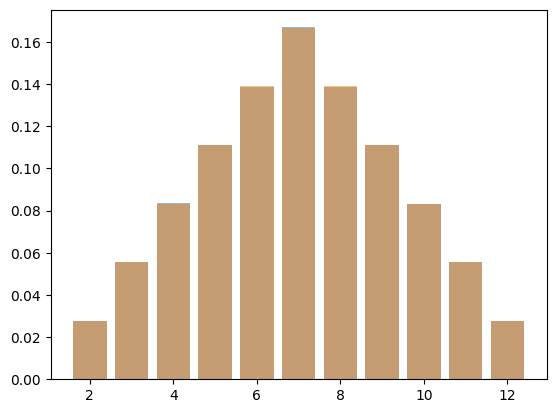

In [5]:
# let's generate expected probabilities
# so 1/36 for 2 and 12
# 2/36 for 3 and 11
# 3/36 for 4 and 10
# 4/36 for 5 and 9
# 5/36 for 6 and 8
# 6/36 for 7

expected = {i:0 for i in range(2,13)}
expected[2] = 1/36
expected[12] = 1/36
expected[3] = 2/36
expected[11] = 2/36
expected[4] = 3/36
expected[10] = 3/36
expected[5] = 4/36
expected[9] = 4/36
expected[6] = 5/36
expected[8] = 5/36
expected[7] = 6/36

# plot two plots on same graph
# one actual
# one expected
plt.bar(result_dict.keys(), result_dict.values(), alpha=0.5)
plt.bar(expected.keys(), expected.values(), alpha=0.5)

plt.show()



<BarContainer object of 21 artists>

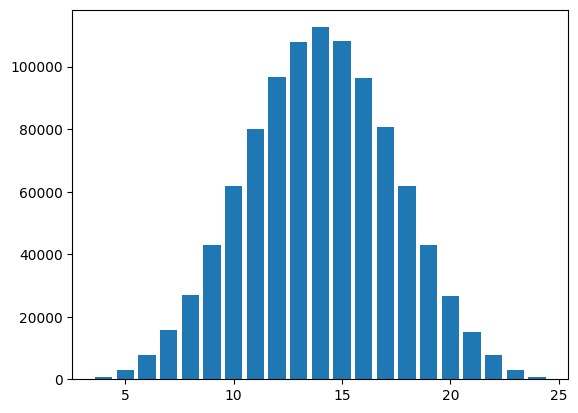

In [6]:
# let's simulare 4 dice throws
# so we have 6^4 = 1296 events
# so we will have 4 to 24 as the event space for sum of 4 dice throws
NUM_TRIALS = 1_000_000
throws = [random.randint(1,6) + random.randint(1,6) + random.randint(1,6) + random.randint(1,6) for _ in range(NUM_TRIALS)]
counter = Counter(throws)
# let's also plot the results from the counter
plt.bar(counter.keys(), counter.values())

## Law of large numbers

- The law of large numbers states that the relative frequency of an event converges to its probability as the number of trials increases, meaning that the probability of an event is the long-run proportion of times it occurs.

### 12.2.1 What probabilities are about

- Probability model - A fully specified probability model associates a numerical probability P(ω) with each
possible world. 
- The probability of an event A is the sum of the probabilities of the possible worlds in which A is true.


### 12.2.2 The language of propositions in probability assertions

- Random Variable - A random variable is a function from the sample space to the real numbers.
- Range - The range of a random variable is the set of all possible values it can take.
- Probability Distribution - A probability distribution for a random variable X is a function P(X) that assigns a probability to each value in the range of X.
- Bernoulli Distribution - A Bernoulli distribution is a probability distribution over a binary random variable, which can take on two values (e.g., 0 or 1) with probabilities p and 1-p, respectively.
- Categorical Distribution - A categorical distribution is a probability distribution over a discrete random variable with k possible values, each with a distinct probability.
- Probability Density Function - A probability density function (pdf) is a function that describes the likelihood of a continuous random variable taking on a particular value.

### 12.2.3 Probability Axioms and Their Reasonableness**  
- The basic axioms of probability define the relationships between the probabilities of propositions and their logical counterparts, like negations and disjunctions. For instance, the probability of a proposition and its negation together equal one, P(¬a)=1−P(a)P(\neg a) = 1 - P(a)P(¬a)=1−P(a), and the probability of a disjunction (a union of events) is the sum of the probabilities of the individual events minus the probability of their intersection, P(a∨b)=P(a)+P(b)−P(a∧b)P(a \lor b) = P(a) + P(b) - P(a \land b)P(a∨b)=P(a)+P(b)−P(a∧b).
- These axioms, often associated with Kolmogorov, form the foundation of probability theory, including handling continuous variables. They ensure consistency in the degrees of belief for logically related propositions, similar to how logical assertions must be consistent within possible worlds.
- The axioms' acceptance is supported by arguments like Bruno de Finetti's betting framework, which suggests that an agent's degrees of belief should align with the odds they would accept in a bet. This implies that failing to adhere to the probability axioms would lead to guaranteed losses in such betting scenarios, illustrating the rationality of these axioms for representing beliefs.
- Despite skepticism regarding the practicality of the betting analogy, it symbolizes the decision-making scenarios where agents constantly engage, emphasizing that actions represent bets based on the outcomes they anticipate.
- Philosophical arguments from figures like Cox, Carnap, and Jaynes further advocate for the numerical representation of degrees of belief, showing that probability theory uniquely satisfies the criteria for a rational belief system. These include requirements for consistency, a correspondence with ordinary logic, and the comparability and transitivity of beliefs.
- The effectiveness of probability-based reasoning systems in practical applications has also played a significant role in validating the axioms' utility and reasonableness, beyond philosophical justifications.

## 12.3 Inference Using Full Joint Distribution**  
- **Probabilistic Inference** : The process of deriving new probabilities from known ones using the principles of probability theory. It involves computing the probability of certain events given the probabilities of other, related events. This is fundamental in AI for making decisions under uncertainty, allowing agents to update their beliefs based on new evidence or changes in the environment. 
- **Marginal Probability** : Refers to the probability of an event occurring, irrespective of the outcomes of other variables. It is obtained from the full joint distribution of all variables by summing (or integrating, in the case of continuous variables) over the probabilities of all outcomes for the irrelevant variables. Marginal probability provides a way to focus on the probability of interest by disregarding the specific states of other variables. 
- **Marginalization** : The process of determining the marginal probability of a subset of variables from the full joint distribution. It involves summing the joint probabilities over the values of the variables that are not of interest. Marginalization reduces the dimensionality of the probability distribution, simplifying the analysis by removing unnecessary variables from consideration. 
- **Conditioning** : The operation of updating the probability of an event based on the occurrence of another event. This is achieved by calculating conditional probabilities, which measure the likelihood of one event given that another event has occurred. Conditioning adjusts beliefs in light of new evidence, refining the agent’s understanding of the situation by incorporating relevant information.

These concepts are crucial for performing inference in probabilistic models, allowing agents to reason about uncertainties and make informed decisions. Through the use of full joint distributions, agents can calculate marginal probabilities, apply marginalization to simplify problems, and adjust their beliefs through conditioning, thereby navigating complex, uncertain environments effectively.

## 12.4 Independence**  
- **Statistical Independence** : In statistics, independence is a key concept indicating that the occurrence of one event does not affect the probability of another event. Two variables are independent if the probability of one variable is not influenced by the presence or absence of the other.

Independence simplifies the analysis and calculation of probabilities in many scenarios because it allows for the assumption that the joint probability of independent events can be calculated as the product of their individual probabilities. This assumption significantly reduces the complexity of probabilistic models by minimizing the number of parameters needed to describe the relationships between variables.

In [ ]:
# Conditional probability example
# what is probability of two dice throw sum being 5, if we know that first dice is 4?
# before we knew that first dice was 4 the probability was all different ways of getting 5 from 36 possibilities
# so 4,1 and 1,4, 2,3, 3,2, so 4/36 or 1/9
# once we know the first throw our sample space is reduced to 6 possibilities each with same probability.

## Monty Hall problem

- The Monty Hall problem is a famous probability puzzle based on a game show scenario. In the game, a contestant is asked to choose one of three doors, behind one of which is a car and behind the other two are goats. After the contestant makes their choice, the host, who knows what is behind each door, opens one of the remaining doors to reveal a goat. The contestant is then given the option to switch their choice to the other unopened door. The puzzle asks whether the contestant should switch or stick with their original choice.

In [25]:
# let's make a simulation of Monty Hall problem
from collections import Counter
TRIALS = 10_000
doors = ("goat","goat","car")

picks = []
for trial in range(TRIALS): 
    my_pick = random.choice(doors)
    picks.append(my_pick)

# how many goats and how many cars?
# lets count
counter = Counter(picks)
print(counter)



Counter({'goat': 6669, 'car': 3331})


In [26]:
# let's modify this strategy
# we pick randomly
# then out of the other two doors, host takes one of the goats
# then we switch to the other door

smart_picks = []
# let's simulate this
for trial in range(TRIALS):
    # let's roll a number between 0 and 2
    my_pick_index = random.randint(0,2)
    my_door = doors[my_pick_index]
    # now let's remove the door from the list
    remaining_doors = list(doors)
    remaining_doors.pop(my_pick_index)
    # now let's remove one of the goats
    remaining_doors.remove("goat") # this is the key the HOST always finds a goat, it will NOT show you a car!
    # shuffle the remaining doors
    random.shuffle(remaining_doors)
    # now we switch
    smart_picks.append(remaining_doors[0])

# count the results
counter = Counter(smart_picks)
print(counter)

Counter({'car': 6699, 'goat': 3301})


## 12.5 Bayes' Rule and Its Use**  
- **Bayes' Rule** : Bayes' Rule, also known as Bayes' Theorem, is a fundamental theorem in probability theory that describes how to update the probabilities of hypotheses based on new evidence. It is mathematically expressed as:

![Bayes Rule](https://wikimedia.org/api/rest_v1/media/math/render/svg/4211e3e7c3482573cdfbc0653d48a6279104c899)

P(H∣E)=P(E∣H)×P(H)P(E)P(H|E) = \frac{P(E|H) \times P(H)}{P(E)}P(H∣E)=P(E)P(E∣H)×P(H)​

Here, P(H∣E)P(H|E)P(H∣E) is the posterior probability of the hypothesis HHH given the evidence EEE, P(E∣H)P(E|H)P(E∣H) is the likelihood of the evidence given that the hypothesis is true, P(H)P(H)P(H) is the prior probability of the hypothesis before the evidence is seen, and P(E)P(E)P(E) is the probability of the evidence under all hypotheses. 
- **Usage of Bayes' Rule** : Bayes' Rule is used in various fields, including statistics, machine learning, and artificial intelligence, to update the probability estimate for a hypothesis as more evidence or information becomes available. It allows for a systematic way to adjust beliefs in light of new data, making it foundational for Bayesian inference. The rule provides a way to quantitatively combine prior knowledge (the prior) with new evidence (the likelihood) to form an updated belief (the posterior). 
- **In Decision Making** : Bayes' Rule can guide decision-making under uncertainty by helping to estimate the probability of outcomes given new evidence. This is crucial in areas such as medical diagnosis, where prior knowledge about disease prevalence can be updated with new patient information to assess disease probabilities. 
- **In Machine Learning** : It's applied in Bayesian machine learning models to update the model's parameters as new data is observed. This approach allows models to improve over time with the inclusion of new information, making it particularly useful for adaptive systems that learn from data incrementally. 
- **In Information Filtering** : Bayes' Rule is employed in spam filtering technologies to determine the probability that a given email is spam based on the presence of certain words. The prior probability of any email being spam is updated as each word in the email is considered, leading to a posterior probability that guides the filtering decision.

Bayes' Rule facilitates a dynamic and flexible approach to probability estimation, where beliefs are adjusted as new evidence is incorporated, making it a powerful tool for inference and prediction in uncertain environments.

## 12.6 Naive Bayes Models**  
- **Naive Bayes Model** : A Naive Bayes model is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. It calculates the probability of a particular outcome (or class) given a set of input features (or attribute values), assuming that each feature contributes independently to the probability of the outcome, regardless of any possible correlations between features. 
- **Why It's Called Naive** : The model is termed "naive" because it simplifies the complexity of calculating probabilities by assuming that all features are independent of each other given the class label. This assumption is naive because, in real-world situations, features can often be related in complex ways. Despite this simplification, Naive Bayes models can perform surprisingly well in many scenarios, especially in text classification tasks like spam detection and document categorization.

The Naive Bayes model's strength lies in its simplicity, efficiency, and ease of implementation, making it a popular choice for applications where computational resources are limited or when a quick, reliable approximation is needed. Its effectiveness, even with the naive assumption of feature independence, has been demonstrated in various domains, underscoring the trade-off between model complexity and practical utility.


### Bayes Model Exampel - Spam Filtering

Example of Naive Bayes Model** 

Consider a simple example where we want to classify emails as either "spam" or "not spam" based on the presence of certain keywords. Let's use "money" and "free" as our features and assume we have the following probabilities based on our training dataset: 
- Prior probabilities: 
- P(Spam)=0.5P(\text{Spam}) = 0.5P(Spam)=0.5 
- P(Not Spam)=0.5P(\text{Not Spam}) = 0.5P(Not Spam)=0.5 
- Likelihoods: 
- P("money"∣Spam)=0.8P(\text{"money"} | \text{Spam}) = 0.8P("money"∣Spam)=0.8 
- P("free"∣Spam)=0.7P(\text{"free"} | \text{Spam}) = 0.7P("free"∣Spam)=0.7 
- P("money"∣Not Spam)=0.2P(\text{"money"} | \text{Not Spam}) = 0.2P("money"∣Not Spam)=0.2 
- P("free"∣Not Spam)=0.3P(\text{"free"} | \text{Not Spam}) = 0.3P("free"∣Not Spam)=0.3 
- Evidence (overall probability of words): 
- Assume we have calculated or can calculate P("money")P(\text{"money"})P("money") and P("free")P(\text{"free"})P("free") based on the dataset.

Given an email with the words "money" and "free", we want to calculate: 
- P(Spam∣"money","free")P(\text{Spam} | \text{"money"}, \text{"free"})P(Spam∣"money","free") 
- P(Not Spam∣"money","free")P(\text{Not Spam} | \text{"money"}, \text{"free"})P(Not Spam∣"money","free")

Using naive Bayes, we apply the model:

P(Spam∣"money","free")=P("money"∣Spam)×P("free"∣Spam)×P(Spam)P("money")×P("free")P(\text{Spam} | \text{"money"}, \text{"free"}) = \frac{P(\text{"money"} | \text{Spam}) \times P(\text{"free"} | \text{Spam}) \times P(\text{Spam})}{P(\text{"money"}) \times P(\text{"free"})}P(Spam∣"money","free")=P("money")×P("free")P("money"∣Spam)×P("free"∣Spam)×P(Spam)​

P(Not Spam∣"money","free")=P("money"∣Not Spam)×P("free"∣Not Spam)×P(Not Spam)P("money")×P("free")P(\text{Not Spam} | \text{"money"}, \text{"free"}) = \frac{P(\text{"money"} | \text{Not Spam}) \times P(\text{"free"} | \text{Not Spam}) \times P(\text{Not Spam})}{P(\text{"money"}) \times P(\text{"free"})}P(Not Spam∣"money","free")=P("money")×P("free")P("money"∣Not Spam)×P("free"∣Not Spam)×P(Not Spam)​

We compare these posterior probabilities to classify the email. The class (spam or not spam) with the higher posterior probability is chosen as the prediction. The denominator P("money")×P("free")P(\text{"money"}) \times P(\text{"free"})P("money")×P("free") is the same for both calculations, so for classification purposes, we can ignore it and focus on comparing the numerators.

This example simplifies the calculation process and demonstrates the application of naive Bayes for classification, showing how prior knowledge combined with the likelihood of observed features under each class leads to a posterior probability that can be used for decision-making. Despite its simplicity and the naive assumption of feature independence, naive Bayes can be highly effective for certain types of data and problems.


## 12.7 The Wumpus World Revisited**  
- This section applies the principles of probabilistic reasoning to the Wumpus World, a scenario where an agent must navigate through a grid with potential hazards like pits based on partial sensor information. Unlike pure logical inference, which may not determine the safest path due to lack of complete information, a probabilistic approach can significantly enhance decision-making. 
- **Objective** : Calculate the probability that certain squares contain a pit, ignoring the presence of the Wumpus and gold for simplicity. The approach involves defining Boolean variables for each square to indicate the presence of a pit (Pij) and breezes (Bij), with the latter only for observed squares. 
- **Probabilistic Model** : The full joint distribution P(P1,1,…,P4,4,B1,1,B1,2,B2,1)P(P_{1,1},\ldots,P_{4,4},B_{1,1},B_{1,2},B_{2,1})P(P1,1​,…,P4,4​,B1,1​,B1,2​,B2,1​) is specified, leveraging the product rule. This model accounts for the conditional probabilities of breezes given pit configurations and the independent prior probabilities of pit occurrences in each square. 
- **Inference Process** : To determine the likelihood of a pit in a specific square (e.g., [1,3]), given the evidence of observed breezes and known safe squares, the text illustrates how to sum over the full joint distribution. However, due to computational complexity with increasing unknowns, it's efficient to focus on "frontier" variables adjacent to visited squares and apply conditional independence to simplify calculations. 
- **Example Calculation** : The example shows how to compute the probability of a pit in square [1,3] by considering only the relevant "frontier" squares ([2,2] and [3,1]). This reduces the computational burden from considering all permutations of unknown squares. The calculation highlights how probabilities are adjusted based on observed evidence (breezes) and known safe squares, resulting in a more informed decision-making process than what pure logic can offer. 
- **Conclusion** : The Wumpus World example demonstrates that probabilistic reasoning, through careful formulation and leveraging concepts of independence and conditional independence, can solve complex problems efficiently. The probabilistic agent is able to discern that [2,2] is significantly riskier than other squares, a nuance that logical deduction alone could not provide. This emphasizes the power of probabilistic inference in enhancing decision-making in uncertain environments.

## Chapter 12: Summary** 
- Uncertainty is inherent in complex, nondeterministic, or partially observable environments due to factors like laziness (the impracticality of considering every possibility) and ignorance (lack of complete knowledge).
- Probabilities articulate an agent's degree of belief in the truth of propositions, serving as a summary of the agent's state of knowledge or beliefs in light of available evidence.
- Decision theory integrates beliefs (probabilities) and desires (utilities) to identify the optimal action as the one that maximizes expected utility, guiding rational decision-making under uncertainty.
- Basic probability notations include prior (unconditional) and posterior (conditional) probabilities, addressing both simple and complex propositions to represent belief states before and after considering new evidence.
- The axioms of probability provide constraints that ensure logical consistency among beliefs related to logically connected propositions. Violation of these axioms implies irrational behavior.
- The full joint probability distribution delineates the probability for every possible combination of variable values, offering a comprehensive but often impractically large framework for answering probabilistic queries through summation over relevant possible worlds.
- Absolute independence between variable subsets permits the decomposition of the full joint distribution into simpler components, significantly simplifying complexity and computational demands.
- Bayes' rule facilitates the computation of unknown probabilities from known conditional probabilities, particularly useful for inferring causes from observed effects. However, scaling issues arise with increasing evidence.
- Conditional independence, typically arising from direct causal relationships, enables further factorization of the joint distribution into more manageable conditional distributions, easing the computational burden.
- The naive Bayes model presumes conditional independence among all effect variables given a single cause, scaling linearly with the number of effects and simplifying calculations.
- In scenarios like the Wumpus World, probabilistic reasoning allows for the estimation of probabilities for unobserved world aspects, outperforming purely logical agents by leveraging conditional independence to make tractable calculations for improved decision-making.

## Chapter 12 - Bibliographical and Historical Notes**  
- **Origins of Probability Theory** : The mathematical analysis of probability originated with the study of games of chance. Early contributions came from the Indian mathematician Mahaviracarya around 850 CE and were further developed in Europe by Girolamo Cardano in the 16th century. The discipline was formalized through correspondence between Blaise Pascal and Pierre de Fermat in 1654, with the first textbook on probability published by Huygens in 1657. 
- **Views on Uncertainty** : John Arbuthnot highlighted the role of "laziness and ignorance" in uncertainty, suggesting that events deemed as chance result from a lack of precise knowledge about causes. This perspective underscores probability theory as a method to manage uncertainty in complex systems where exact outcomes cannot be determined. 
- **Probability and Reasoning** : The connection between probability and logical reasoning has historical roots, with notable figures like Pierre Laplace and James Maxwell emphasizing probability theory as an extension of common sense or as the true logic for the world, acknowledging its role in quantifying belief based on evidence. 
- **Debates on Probability** : There has been longstanding debate over the interpretation of probability numbers - whether they derive from experimental frequencies (frequentist view), reflect inherent propensities of objects (objectivist view), or represent subjective degrees of belief (subjectivist view). These discussions explore the foundational principles of probability theory and its application across various domains. 
- **Development of Probability Theory** : The axiomatic foundation of probability theory was established by Kolmogorov in the 20th century, with significant contributions from figures like Frank Ramsey, Bruno de Finetti, and others who advocated for the Bayesian interpretation, emphasizing probabilities as expressions of an agent's beliefs. 
- **Bayesian Reasoning in AI** : Bayesian probabilistic reasoning has been applied in AI since the 1960s, notably in medical diagnosis and decision-making. Despite initial challenges related to data representation and computational efficiency, advancements in the representation of conditional independence have revitalized interest in probabilistic methods within AI. 
- **Naive Bayes Models** : The naive Bayes model, known for its simplicity and effectiveness even when independence assumptions are not strictly met, has been widely studied and applied in pattern recognition, information retrieval, and other fields. 
- **Educational Resources** : The chapter references several introductory textbooks on probability theory that offer both basic and advanced treatments of the subject, highlighting the rich history and ongoing developments in the field of probabilistic reasoning and its applications.